
# Método del Codo con KMeans
Este notebook explica cómo aplicar el método del codo para determinar el número óptimo de clústeres al realizar agrupamiento con KMeans. Utilizaremos un conjunto de datos de Kaggle: **Mall Customer Segmentation Data**.

## Objetivos
- Cargar datos de una fuente en línea.
- Preprocesar los datos.
- Implementar el método del codo para encontrar el número óptimo de clústeres.
- Aplicar KMeans y visualizar los resultados.


In [35]:

# Instalación de bibliotecas necesarias (si es necesario)
!pip install pandas matplotlib scikit-learn
!pip install seaborn
!pip install ipywidgets


In [36]:

# Importar las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Configuración para gráficos más estéticos
sns.set(style="whitegrid")



## Cargar el conjunto de datos
Descargaremos el conjunto de datos "Mall Customer Segmentation Data".


In [37]:

# Cargar datos directamente desde una URL
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/refs/heads/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas del conjunto de datos
data.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



## Exploración inicial de los datos (EDA)
Revisaremos la estructura del conjunto de datos para entender qué columnas son relevantes para el análisis.


In [38]:

# Información general sobre el conjunto de datos
data.info()

# Estadísticas descriptivas
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000



## Selección de características
Para este ejemplo, utilizaremos las columnas `Annual Income (k$)` y `Spending Score (1-100)` para realizar la agrupación.


In [39]:

# Selección de características relevantes
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Mostrar las primeras filas de las características seleccionadas
X.head()


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40



## Método del Codo
El método del codo nos ayuda a encontrar el número óptimo de clústeres al observar la "inercia" o suma de distancias cuadradas internas.


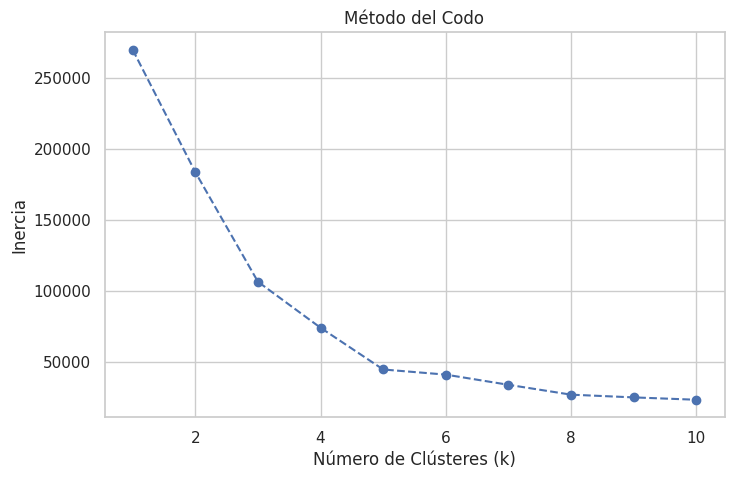

In [40]:

# Calcular el método del codo
inertia = []
range_k = range(1, 11)

for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Visualizar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(range_k, inertia, marker='o', linestyle='--')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()



## Aplicar KMeans con el número óptimo de clústeres
Como se puede apreciar en el grafico anterior, se puede suponer que por el metodo del codo, el que el número óptimo de clústeres esta entre 5 y 6, ya que entre esos valores, se puede apreciar como el primer quiebre de la curva anterior (el gráfico del método del codo), abajo de forma visual e interactiva, se pueden dar cuenta de que el valor optimo es 5.


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import ipywidgets as widgets
from IPython.display import display, clear_output

# Crear un slider para seleccionar el número de clústeres
k_slider = widgets.IntSlider(value=5, min=1, max=10, step=1, description='Clústeres:', continuous_update=False)

# Crear un área de salida para el gráfico
output = widgets.Output()

# Función para actualizar el gráfico
def actualizar_grafico(change):
    k = change['new']
    kmeans = KMeans(n_clusters=k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(X)

    with output:
        clear_output(wait=True)
        plt.figure(figsize=(8, 5))
        sns.scatterplot(
            x='Annual Income (k$)',
            y='Spending Score (1-100)',
            hue='Cluster',
            data=data,
            palette='Set2',
            s=100
        )
        plt.title(f'Agrupación de Clientes (KMeans) con {k} Clústeres')
        plt.show()

# Conectar el slider con la función de actualización
k_slider.observe(actualizar_grafico, names='value')

# Mostrar el slider y el área de salida en una disposición vertical
display(widgets.VBox([k_slider, output]))

# Generar el gráfico inicial
actualizar_grafico({'new': k_slider.value})



## Conclusión
Hemos aplicado con éxito el método del codo para determinar el número óptimo de clústeres y realizamos una agrupación de clientes utilizando KMeans.
